## Predict Loan Approval Status Using Machine Learning

In finance, a loan is the lending of money by one or more individuals, organizations, or other entities to other individuals, organizations etc. The recipient (i.e. the borrower) incurs a debt, and is usually liable to pay interest on that debt until it is repaid, and also to repay the principal amount borrowed. The document evidencing the debt, e.g. a promissory note, will normally specify, among other things, the principal amount of money borrowed, the interest rate the lender is charging, and date of repayment. A loan entails the reallocation of the subject asset(s) for a period of time, between the lender and the borrower.

## Risk's Involved In Mortgage
You are not the only party with risk when it comes to a bank loan. The bank is at risk by lending you the money. Due to the legal cost of recouping loan loss, banks rarely recover the entire amount loaned to a defaulted borrower. Too many of these bad loans cut into a bank’s profits and can ultimately hurt its business. If multiple banks carry numerous bad loans, it can negatively affect the market, driving rates up. This can have a negative effect on the economy as a whole.

## Ways to avoid bad loan's
One of the common ways which are followed by the bankers before lending a loan to a customer is by verifying his personal assets and liabilities. We have a dataset which consists of `614` rows and `13` features.

**All Column: ** `Loan_ID`, `Gender`, `Married`, `Dependents`, `Education`, `Self_Employed`, `ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term`, `Credit_History`, `Property_Area`, `Loan_Status`

** Features: ** `Loan_ID`, `Gender`, `Married`, `Dependents`, `Education`, `Self_Employed`, `ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term`, `Credit_History`, `Property_Area`

** Target: ** `Loan_Status`

In [2]:
# Import libraries used 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Convert the dataset into dataframes
df = pd.read_csv('datasets/loan_dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Basic Descriptive Statistics Of Dataset

We can first analyse the complete dataframe using `describe()` method on the dataframe. Now the continuous variables summary has been generated below.

### Continous Variable
- ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History

### Categorical Variable
- Property_Area, Loan_Status, Self_Employed, Gender, Married, Education, ApplicantIncome


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


We can use `value_counts()` method on each columns to understand the total count of each unique values of the column

In [29]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

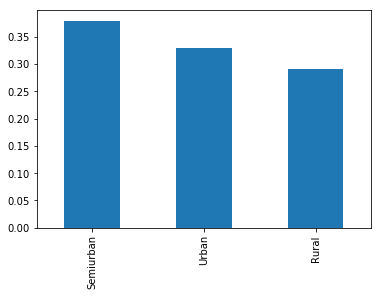

In [31]:
'''
    We can make it a bar chat using .plot.bar() method 
    and by passing normalize=True parameter to value_counts() method
    we get percentage of count than actual counts
''' 
df['Property_Area'].value_counts(normalize=True).plot.bar()

In our dataset `Property_Area` has three categories 
- `Semiurban` with 233 occurance , 
- `Urban` with 202, 
- `Rural` with 179

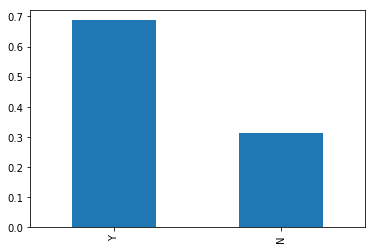

In [21]:
df['Loan_Status'].value_counts(normalize=True).plot.bar()

**observation**:

In give dataframe `Loan_Status` is the **target variable** which  has 
- **Y** refers to approved
- **N** refers to disapproved 

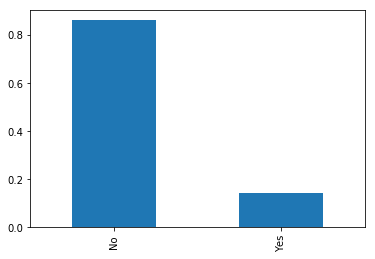

In [26]:
df['Self_Employed'].value_counts(normalize=True).plot.bar()

We can see in **`Self_Employed`** column 86% of people applied for loan are Not self employeed
- No - 500 (86%)
- Yes - 82 (14%)

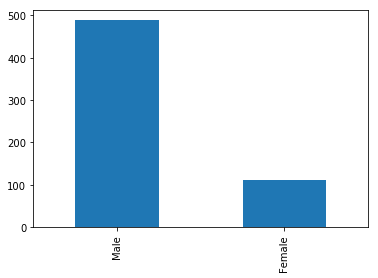

In [17]:
df['Gender'].value_counts().plot.bar()

Close to `81%` of people who applied for the loan are `Male`
and `19%` are `Females`.

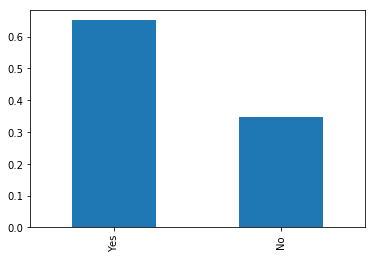

In [28]:
df['Married'].value_counts(normalize=True).plot.bar()

**60%** of loans are taken by **Married**

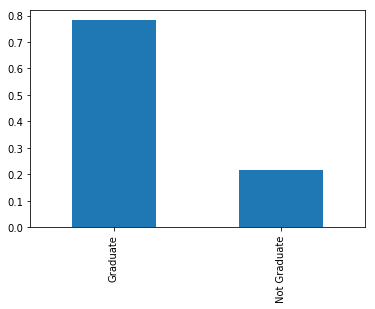

In [33]:
df['Education'].value_counts(normalize=True).plot.bar()

**75%** of Graduates applies for a loan and **20%** of Not Graduation also applies.

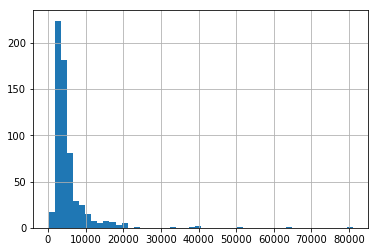

In [35]:
df['ApplicantIncome'].hist(bins=50)

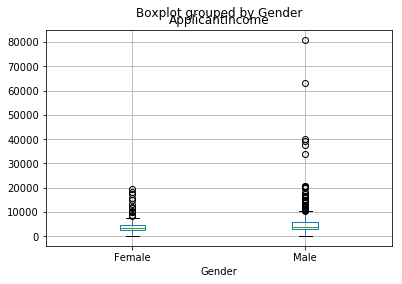

In [36]:
df.boxplot(column='ApplicantIncome', by = 'Gender')

According to the above observation, we can see **Males** with **High Income** applying for loans

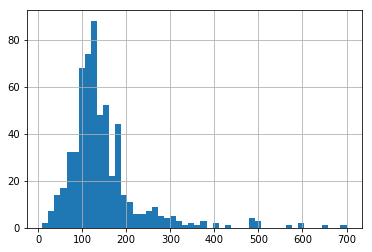

In [40]:
df['LoanAmount'].hist(bins=50)

- X-axis is the values of loan amount
- Y-axis is frequencies of different values of loan amount

In [46]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

### Lets Create Pivot Table to see probability of getting loan as per the credit history
We can use the `Loan_Status` as desired value and `Credit_History` as decision feature and lets map the **Y** and **N** in `Loan_Status` column to 1 and 0 using map() function

In [48]:
pt = df.pivot_table(values='Loan_Status',
                    index=['Credit_History'],
                    aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

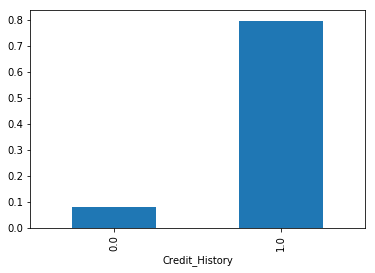

In [50]:
pt.plot.bar()

We can clearly see **80%** of loan approval are based on customers `Credit_History`.

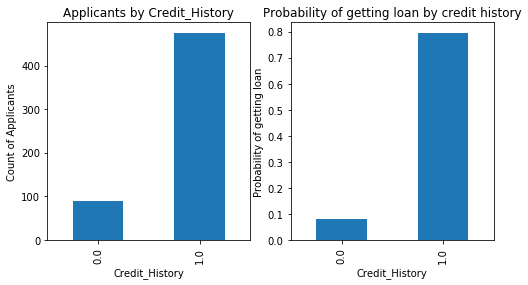

In [54]:
# Get only the credit_history count
credit_history = df['Credit_History'].value_counts(ascending=True)

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)

ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
credit_history.plot(kind='bar')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
pt.plot(kind = 'bar')

In [55]:
pivot_gender = df.pivot_table(values='Gender',index=['Credit_History'],aggfunc=lambda x: x.map({'Female':1,'Male':0}).mean())
pivot_gender

Credit_History
0.0    0.197674
1.0    0.180258
Name: Gender, dtype: float64

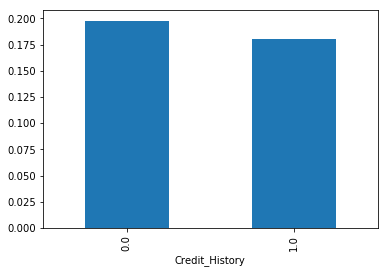

In [56]:
pivot_gender.plot.bar()

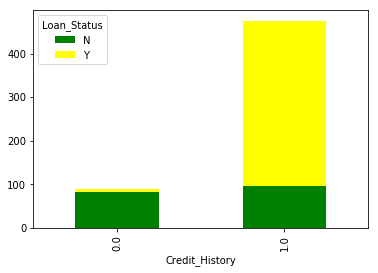

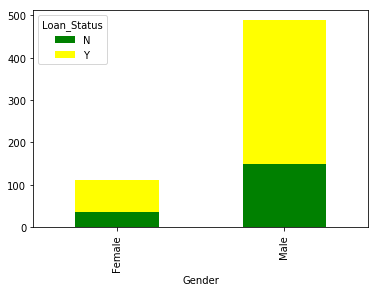

In [58]:
# combining the above 2 plots in a stacked chart
stack_chart = pd.crosstab(df['Credit_History'], df['Loan_Status'])
stack_chart.plot(kind='bar', stacked=True, color=['green','yellow'], grid=False)
stack_chart = pd.crosstab(df['Gender'], df['Loan_Status'])
stack_chart.plot(kind='bar', stacked=True, color=['green','yellow'], grid=False)

Based on above observations we can understand `Credit_History` plays a major role in loan approval and Loans are approved irrespective of the Gender

## Data Cleaning

Let's now start build a prediction model (Machine learning) model. Models are also called classifiers. Before building a machine learning model we have to clean the data by
- Treating missing values
- Get rid of identifier columns

In [59]:
# Find missing values in each columns
df.apply(lambda x: sum(x.isnull()),axis=0)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## We can see
- `Gender` has *13* missing values
- `Married has` *3* missing values
- `Dependents` has *15* missing values
- `Self_Employed` has *32* missing values
- `LoanAmount` has *22* missing values
- `Loan_Amount_Term` has *14*
- `Credit_History` has *50* missing values

### Fill mean() using fillna() for LoanAmount 

In [60]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,84.037468,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Treating Self_Employed columns

In [64]:
self_employed = df['Self_Employed'].value_counts(ascending=True)
self_employed

Yes     82
No     500
Name: Self_Employed, dtype: int64

Since in `Self_Employed` there are 80% **No** we can fill missing value with **No**

In [66]:
df.Self_Employed = df.Self_Employed.fillna('No')
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,84.037468,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000
